# Queue

In [2]:
from multiprocessing import Queue

q = Queue()
#put items at the end of the queue
for x in range(4):
    q.put("item-" + str(x))
print("Queue empty: {}".format(q.empty()))


#remove items from the head of the queue
while not q.empty():
    print q.get()

Queue empty: False
item-0
item-1
item-2


In [172]:
qu = Queue()
for x in range(4):
    qu.put(x)
print("Queue empty: {}".format(qu.empty()))
while not qu.empty():
    #print qu.get()
    z = qu.get()
    print(z)
print("Queue empty: {}".format(qu.empty()))

Queue empty: False
0
1
2
3
Queue empty: True


##### Example of how to wait for enqueued tasks to be completed:

In [211]:
from threading import Thread

def worker():
    #while True:
    item = q.get()
    print(item)
    #q.task_done()

q = Queue()

for item in range(4):
    q.put(item) 
print("Queue empty: {}".format(q.empty()))    
#print("Queue size: {}".format(q.qsize()))    

 
for i in range(4):
    t = Thread(target=worker)
    t.daemon = True
    t.start()

#q.join()       # block until all tasks are done

Queue empty: False
0
1
2
3


As per the documentation, neither empty(), full(), nor qsize() are reliable.

Alternatives includes:

Reading the exact amount of items going through the Queue:

This is useful if you know beforehand how many items must be processed in total or how many will be processed by each thread.



In [212]:
q = Queue()

for item in range(4):
    q.put(item) 

for item in range(4):
    print q.get(item) 


0
1
2
3


In [215]:
q = Queue()


for item in range(4):
    q.put(item) 
    
q = Queue()   #q.clear()  # Clear Queue
 
for item in range(1):
    print q.get(item) 

Empty: 

# Graph

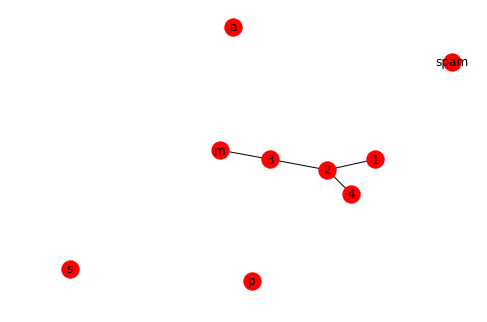

In [4]:
import networkx as nx
G = nx.Graph()
G.add_edges_from([(4, 2), (2, 3)])
G.add_node(1)
G.add_edge(1, 2)
G.add_node("spam")        # adds node "spam"
G.add_nodes_from("spam")  # adds 4 nodes: 's', 'p', 'a', 'm'
G.add_edge(3, 'm')
nx.draw(G, with_labels = True)

In [99]:
G.number_of_nodes()

9

In [100]:
G.number_of_edges()

4

In [101]:
list(G.nodes)

['a', 1, 2, 3, 4, 'spam', 'm', 'p', 's']

In [102]:
list(G.edges)

[(1, 2), (2, 3), (2, 4), (3, 'm')]

In [103]:
print(list(G.adj[1]))
print(list(G.adj[2]))
print(list(G.neighbors(2)))
print(G[2])  # same as G.adj[1]
print(G[2][1])

[2]
[1, 3, 4]
[1, 3, 4]
{1: {}, 3: {}, 4: {}}
{}


In [104]:
print(G.degree[1])
print(G.degree[2])

1
3


In [105]:
G.edges([4, 1, 'm'])

EdgeDataView([(4, 2), (1, 2), ('m', 3)])

In [106]:
G.degree([2, 3, 'm'])

DegreeView({2: 3, 3: 2, 'm': 1})

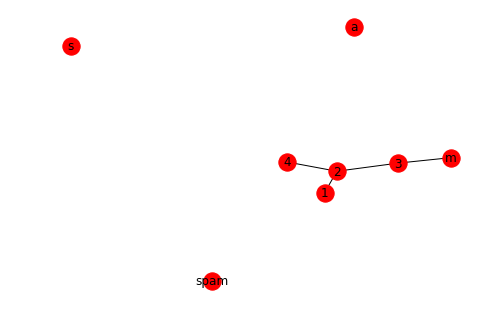

In [107]:
G.remove_node('p')
nx.draw(G, with_labels = True)

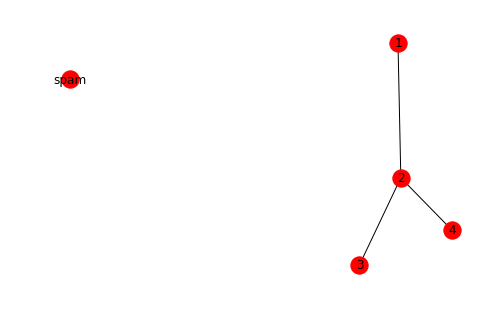

In [108]:
G.remove_nodes_from("spam")
nx.draw(G, with_labels = True)

In [109]:
list(G.nodes)

[1, 2, 3, 4, 'spam']

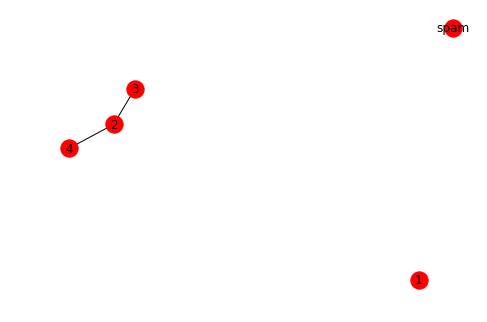

In [110]:
G.remove_edge(1, 2)
nx.draw(G, with_labels = True)

[(1, 2), (2, 1), (2, 3), (2, 4), (3, 2), (4, 2)]


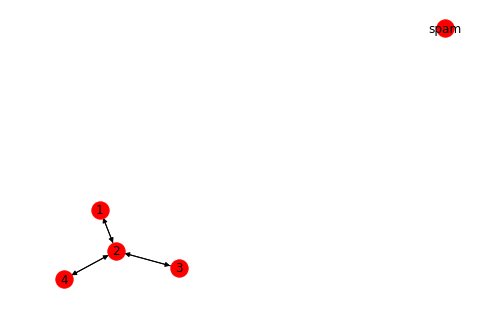

In [111]:
G.add_edge(1, 2)
H = nx.DiGraph(G)   # create a DiGraph using the connections from G
nx.draw(H, with_labels = True)
print(list(H.edges()))

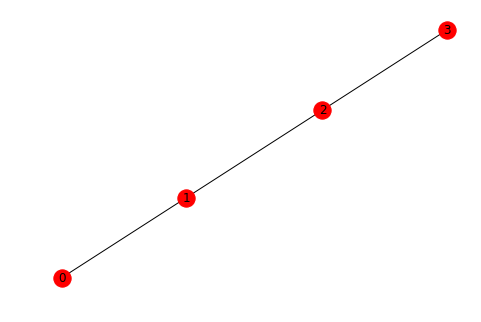

In [112]:
edgelist = [(0, 1), (1, 2), (2, 3)]
H = nx.Graph(edgelist)
nx.draw(H, with_labels = True)

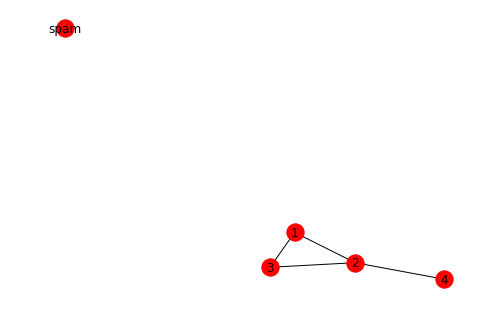

In [113]:
G.add_edge(1, 3)
G[1][3]['color'] = "blue"
nx.draw(G, with_labels = True)

In [114]:
print(G.edges[1, 3]['color'])
G.edges[1, 3]['color'] = "red"
print(G.edges[1, 3]['color'])

blue
red


[(1, AtlasView({2: {'weight': 0.125}, 3: {'weight': 0.75}})), (2, AtlasView({1: {'weight': 0.125}, 4: {'weight': 1.2}})), (3, AtlasView({1: {'weight': 0.75}, 4: {'weight': 0.375}})), (4, AtlasView({2: {'weight': 1.2}, 3: {'weight': 0.375}}))]


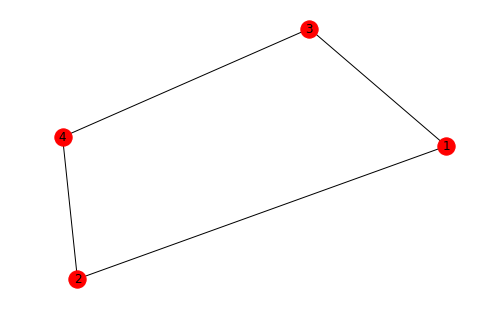

In [115]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
nx.draw(FG, with_labels = True)
print(FG.adj.items())

In [116]:
nx.shortest_path(FG, 1, 4)

[1, 2, 4]

In [117]:
for n, nbrs in FG.adj.items():
...    for nbr, eattr in nbrs.items():
...        wt = eattr['weight']
...        if wt < 0.5: print('(%d, %d, %.3f)' % (n, nbr, wt))

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


In [118]:
print(FG.edges.data('weight'))
for (u, v, wt) in FG.edges.data('weight'):
    if wt < 0.5: print('(%d, %d, %.3f)' % (u, v, wt))

[(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)]
(1, 2, 0.125)
(3, 4, 0.375)


### Graph attributes

{'day': 'Friday'}

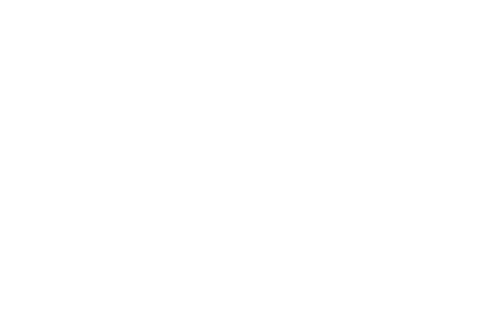

In [119]:
G = nx.Graph(day="Friday")
nx.draw(G, with_labels = True)
G.graph

In [120]:
G.graph['day'] = "Monday"
G.graph

{'day': 'Monday'}

### Node attributes

{'time': '5pm'}

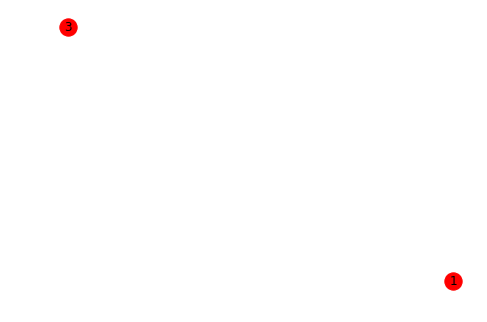

In [121]:
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
nx.draw(G, with_labels = True)
G.nodes[1]

In [122]:
G.nodes[1]['room'] = 714
G.nodes.data()

NodeDataView({1: {'room': 714, 'time': '5pm'}, 3: {'time': '2pm'}})

In [23]:
G = nx.Graph()
edges = [(0, 1), (0, 2), (2, 3), (1, 3), (3, 4), (3, 5), (4, 5), (2, 5)]
G.add_edges_from(edges)
for node in list(G.nodes):
    G.nodes[node]['layer'] = float('inf')
G.nodes.data()

NodeDataView({0: {'layer': inf}, 1: {'layer': inf}, 2: {'layer': inf}, 3: {'layer': inf}, 4: {'layer': inf}, 5: {'layer': inf}})

### Edge Attributes

{'color': 'blue', 'weight': 5.5}
{'color': 'red'}
[(0, {'layer': inf}), (1, {'layer': inf}), (2, {'layer': inf}), (3, {'layer': inf}), (4, {'layer': inf}), (5, {'layer': inf})]
[(0, 1, {}), (0, 2, {}), (1, 2, {'color': 'blue', 'weight': 5.5}), (1, 3, {}), (2, 3, {'weight': 8}), (2, 5, {}), (3, 4, {'color': 'red', 'weight': 4.2}), (3, 5, {}), (4, 5, {'color': 'red'})]


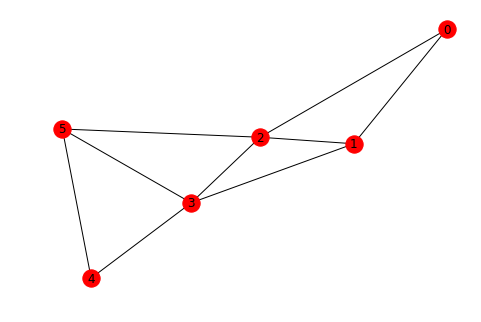

In [24]:
G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
G[1][2]['weight'] = 5.5
print(G[1][2])
print(G[4][5])
G.edges[3, 4]['weight'] = 4.2
nx.draw(G, with_labels = True)
print( G.nodes.data() )
print( G.edges.data() )

In [29]:
G.edges[3, 4]['weight'] = 777
print( G.edges.data() )
G.edges[4, 3]['weight'] = 999
print( G.nodes.data() )
print( G.edges.data() )

[(0, 1, {}), (0, 2, {}), (1, 2, {'color': 'blue', 'weight': 5.5}), (1, 3, {}), (2, 3, {'weight': 8}), (2, 5, {}), (3, 4, {'color': 'red', 'weight': 777}), (3, 5, {}), (4, 5, {'color': 'red'})]
[(0, {'layer': inf}), (1, {'layer': inf}), (2, {'layer': inf}), (3, {'layer': inf}), (4, {'layer': inf}), (5, {'layer': inf})]
[(0, 1, {}), (0, 2, {}), (1, 2, {'color': 'blue', 'weight': 5.5}), (1, 3, {}), (2, 3, {'weight': 8}), (2, 5, {}), (3, 4, {'color': 'red', 'weight': 999}), (3, 5, {}), (4, 5, {'color': 'red'})]


[(1, 2, {'weight': 5}), (2, 8, {'weight': 1}), (3, 4, {'weight': 1}), (4, 5, {'weight': 2}), (5, 6, {'weight': 4}), (6, 7, {'weight': 1})]


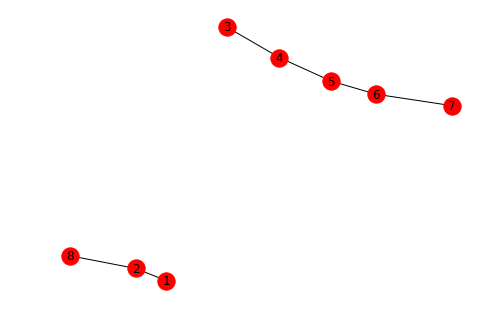

In [32]:
challenge_graph = nx.Graph()
edges = [ (3, 4, 1), (4, 5, 2), (5, 6, 4), (6, 7, 1)]
challenge_graph.add_weighted_edges_from(edges)
edges2 = [(1, 2, 5), (2, 8, 1)]
challenge_graph.add_weighted_edges_from(edges2)
nx.draw(challenge_graph, with_labels = True)
print(challenge_graph.edges.data())

# Directed graphs

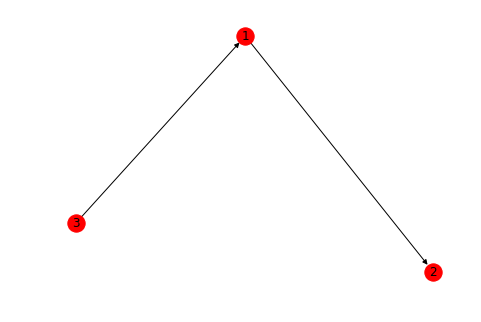

In [124]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
nx.draw(DG, with_labels = True)

In [125]:
DG.out_degree(1, weight='weight')

0.5

In [70]:
DG.degree(1, weight='weight')

1.25

In [71]:
list(DG.successors(1))

[2]

In [72]:
list(DG.neighbors(1))

[2]

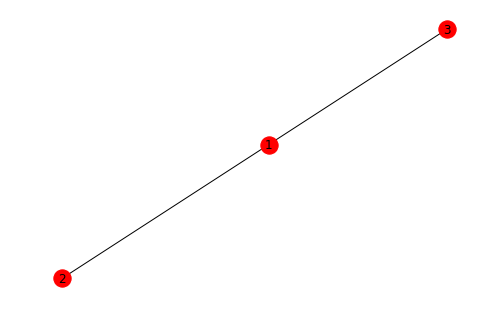

In [74]:
H = nx.Graph(DG)  # convert G to undirected graph
nx.draw(H, with_labels = True)

##### Reverse a Directed Graph

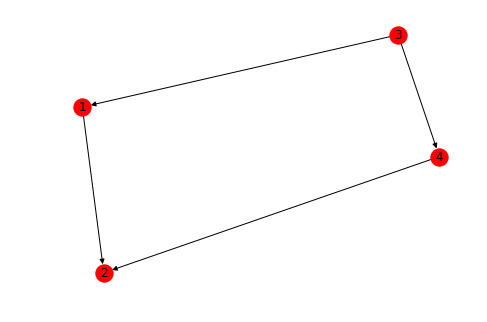

In [222]:
DG = nx.DiGraph()
DG.add_edges_from([(1, 2), (3, 1), (3, 4), (4, 2)])
nx.draw(DG, with_labels = True)

In [228]:
for s in DG.successors(4):
    print("Successor of 4: {}".format(s))
for s in DG.successors(3):
    print("Successor of 3: {}".format(s))
for s in DG.successors(2):
    print("Successor of 2: {}".format(s))

Successor of 4: 2
Successor of 3: 1
Successor of 3: 4


In [229]:
for p in DG.predecessors(4):
    print("Predecessors of 4: {}".format(p))
for p in DG.predecessors(3):
    print("Predecessors of 3: {}".format(p))
for p in DG.predecessors(2):
    print("Predecessors of 2: {}".format(p))

Predecessors of 4: 3
Predecessors of 2: 1
Predecessors of 2: 4


In [247]:
print("OutEdgeView: {}".format(DG.edges))
print("OutEdgeView: {}".format(DG.edges()))
print("InEdgeView: {}".format(DG.in_edges))
print("number_of_nodes: {}".format(DG.number_of_nodes()))
print("order: {}".format(DG.order()))
print("DegreeView: {}".format(DG.degree()))
print("DegreeView: {}".format(DG.degree))
print("InDegreeView: {}".format(DG.in_degree))
print("OutDegreeView: {}".format(DG.out_degree))
print("Size: {}".format(DG.size())) # Returns the number of edges or total of all edge weights.
print("number_of_edges: {}".format(DG.number_of_edges())) # Returns the number of edges between two nodes.

OutEdgeView: [(1, 2), (3, 1), (3, 4), (4, 2)]
OutEdgeView: [(1, 2), (3, 1), (3, 4), (4, 2)]
InEdgeView: [(3, 1), (1, 2), (4, 2), (3, 4)]
number_of_nodes: 4
order: 4
DegreeView: [(1, 2), (2, 2), (3, 2), (4, 2)]
DegreeView: [(1, 2), (2, 2), (3, 2), (4, 2)]
InDegreeView: [(1, 1), (2, 2), (3, 0), (4, 1)]
OutDegreeView: [(1, 1), (2, 0), (3, 2), (4, 1)]
Size: 4
number_of_edges: 4


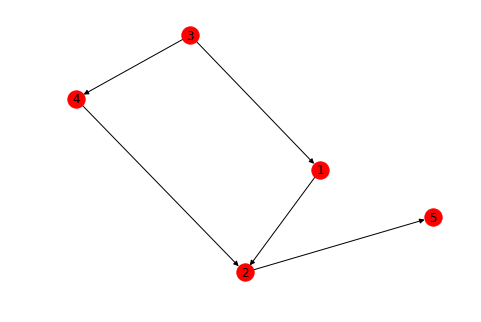

In [250]:
copyDG = DG.copy(as_view=False)
copyDG.add_edge(2, 5)    
nx.draw(copyDG, with_labels = True)

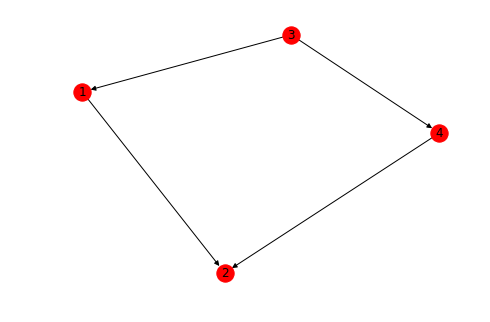

In [251]:
nx.draw(DG, with_labels = True)

##### networkx.DiGraph.reverse

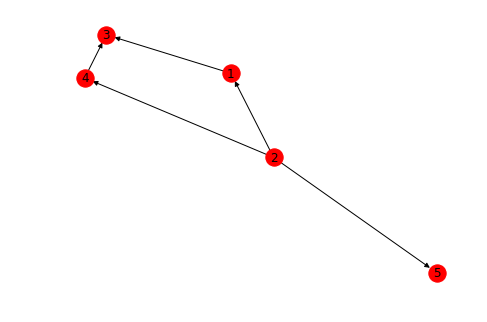

In [272]:
reverseDG = DG.reverse() # default copy=True
reverseDG.add_edge(2, 5)    

nx.draw(reverseDG, with_labels = True)

In [277]:
for i in reverseDG:
    print(i)
    if i == 5:
        adj = {5: {2}}
        reverseDG.update(edges=None, nodes=adj)
nx.draw(reverseDG, with_labels = True)

1
2
3
4
5


AttributeError: 'DiGraph' object has no attribute 'update'

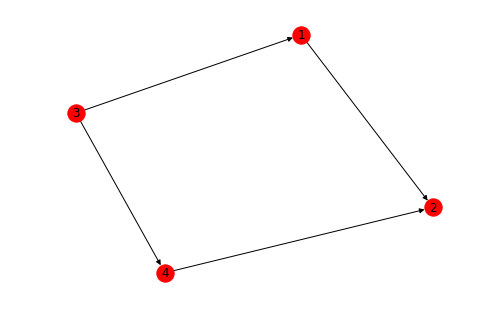

In [265]:
nx.draw(DG, with_labels = True)

##### If False, the reverse graph is created using a view of the original graph.

In [266]:
reverseDG = DG.reverse(copy=False) # default copy=True # If False, the reverse graph is created using a view of the original graph.
reverseDG.add_edge(2, 5)    
nx.draw(reverseDG, with_labels = True)

NetworkXError: SubGraph Views are readonly. Mutations not allowed

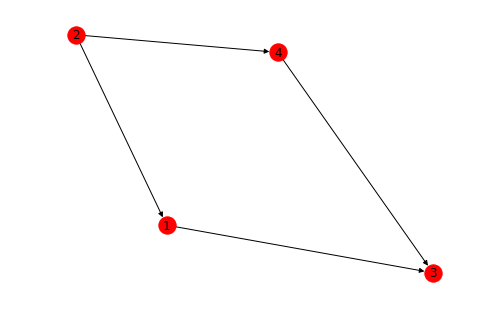

In [268]:
reverseviewDG = DG.reverse(copy=False) 
nx.draw(reverseviewDG, with_labels = True)

In [269]:
print("OutEdgeView: {}".format(reverseviewDG.edges))
print("OutEdgeView: {}".format(reverseviewDG.edges()))
print("InEdgeView: {}".format(reverseviewDG.in_edges))
print("number_of_nodes: {}".format(reverseviewDG.number_of_nodes()))
print("order: {}".format(reverseviewDG.order()))
print("DegreeView: {}".format(reverseviewDG.degree()))
print("DegreeView: {}".format(reverseviewDG.degree))
print("InDegreeView: {}".format(reverseviewDG.in_degree))
print("OutDegreeView: {}".format(reverseviewDG.out_degree))
print("Size: {}".format(reverseviewDG.size())) # Returns the number of edges or total of all edge weights.
print("number_of_edges: {}".format(reverseviewDG.number_of_edges())) # Returns the number of edges between two nodes.

OutEdgeView: [(1, 3), (2, 1), (2, 4), (4, 3)]
OutEdgeView: [(1, 3), (2, 1), (2, 4), (4, 3)]
InEdgeView: [(2, 1), (1, 3), (4, 3), (2, 4)]
number_of_nodes: 4
order: 4
DegreeView: [(1, 2), (2, 2), (3, 2), (4, 2)]
DegreeView: [(1, 2), (2, 2), (3, 2), (4, 2)]
InDegreeView: [(1, 1), (2, 0), (3, 2), (4, 1)]
OutDegreeView: [(1, 1), (2, 2), (3, 0), (4, 1)]
Size: 4
number_of_edges: 4


#### Nodes and Edges attribute access

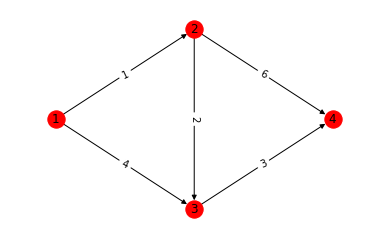

In [7]:
DG = nx.DiGraph()
DG.add_node(1, pos = (0, 5))
DG.add_node(2, pos = (7, 10))
DG.add_node(3, pos = (7, 0))
DG.add_node(4, pos = (14, 5))
DG.add_edge(1, 2, weight = 1)
DG.add_edge(2, 3, weight = 2)
DG.add_edge(3, 4, weight = 3)
DG.add_edge(1, 3, weight = 4)
DG.add_edge(2, 4, weight = 6)
pos = nx.get_node_attributes(DG, 'pos')
weights =nx.get_edge_attributes(DG, 'weight')
nx.draw_networkx_edge_labels(DG, pos, edge_labels = weights)
nx.draw(DG, pos, with_labels = True)

In [21]:
print( "Nodes: {}".format(DG.nodes) )
print( "Edges: {}".format(DG.edges) )
print( "Nodes data: {}".format(DG.nodes.data()) )
print( "Edges data: {}".format(DG.edges.data()) )
print( "Nodes access attributes: {}".format(DG.nodes[2]) )
print( "Nodes access attribute value: {}".format(DG.nodes[2]['pos']) )
print( "Edges access attributes: {}".format(DG.edges[2, 4]) )
print( "Edges access attribute value: {}".format(DG.edges[2, 4]['weight']) )

Nodes: [1, 2, 3, 4]
Edges: [(1, 2), (1, 3), (2, 3), (2, 4), (3, 4)]
Nodes data: [(1, {'pos': (0, 5)}), (2, {'pos': (7, 10)}), (3, {'pos': (7, 0)}), (4, {'pos': (14, 5)})]
Edges data: [(1, 2, {'weight': 1}), (1, 3, {'weight': 4}), (2, 3, {'weight': 2}), (2, 4, {'weight': 6}), (3, 4, {'weight': 3})]
Nodes access attributes: {'pos': (7, 10)}
Nodes access attribute value: (7, 10)
Edges access attributes: {'weight': 6}
Edges access attribute value: 6


# Multigraphs
NetworkX provides classes for graphs which allow multiple edges between any pair of nodes. 

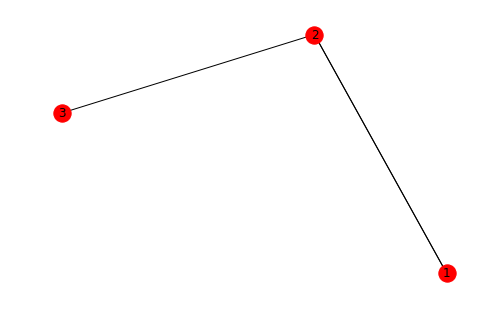

In [75]:
MG = nx.MultiGraph()
MG.add_weighted_edges_from([(1, 2, 0.5), (1, 2, 0.75), (2, 3, 0.5)])
nx.draw(MG, with_labels = True)

In [76]:
dict(MG.degree(weight='weight'))

{1: 1.25, 2: 1.75, 3: 0.5}

In [82]:
GG = nx.Graph()
for n, nbrs in MG.adjacency():
    print("n: {}  nbrs:{}".format(n, nbrs))
    for nbr, edict in nbrs.items():
        minvalue = min([d['weight'] for d in edict.values()])
        GG.add_edge(n, nbr, weight = minvalue)
nx.shortest_path(GG, 1, 3)

n: 1  nbrs:{2: {0: {'weight': 0.5}, 1: {'weight': 0.75}}}
n: 2  nbrs:{1: {0: {'weight': 0.5}, 1: {'weight': 0.75}}, 3: {0: {'weight': 0.5}}}
n: 3  nbrs:{2: {0: {'weight': 0.5}}}


[1, 2, 3]

# UNION-FIND Disjoint-set data structure


In [6]:
from networkx.utils import UnionFind
subtrees = UnionFind()
if subtrees[1] == subtrees[3]:
    pass
print(list(subtrees))


[1, 3]


In [10]:
subtrees.union(3,1)
print(list(subtrees))
print(subtrees[1])

[1, 3]
3


In [12]:
subtrees[9]
subtrees[5]
print(list(subtrees))

[1, 3, 5, 9]
